In [184]:
import math
import os
import numpy as np
from scipy.odr import *
import matplotlib.pyplot as plt
#from operator import itemgetter

In [185]:
class Espectro:
    def __init__(self):
        self.muestra = None
        self.cuentas = []
        self.canales = []
        self.energias = []

In [186]:
espectros = {}
carpeta = "datos/1ra_parte/"

for filename in os.listdir(carpeta):
    temp_spec = Espectro()
    temp_spec.muestra = filename.split(".")[0]  # me quedo con el nombre de la muestra

    temp_file = open(carpeta+filename)                              
    temp_spec.cuentas = [float(x) for x in temp_file.readlines()]   # tomo el valor en notación
    temp_spec.cuentas = [int(x) for x in temp_spec.cuentas]         # científica y lo paso a
    temp_spec.canales = [ch for ch in range(len(temp_spec.cuentas))]# formato entero

    if temp_spec.muestra in list(espectros):
        espectros[temp_spec.muestra].append(temp_spec)
    else:
        espectros[temp_spec.muestra] = []
        espectros[temp_spec.muestra].append(temp_spec)
    
# chequeo que esté todo bien definido
#print(list(espectros))
#for elem in espectros.keys():
#    for i in range(len(espectros[elem])):
#        print(espectros[elem][i].muestra,len(espectros[elem][i].canales),len(espectros[elem][i].cuentas),len(espectros[elem][i].energias))

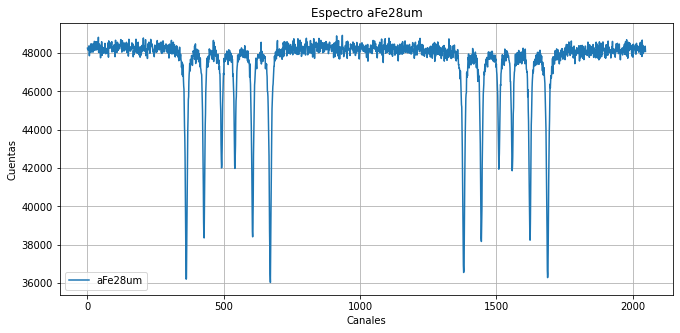

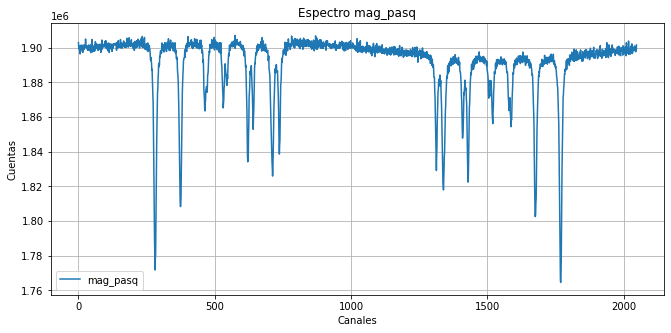

In [187]:
# gráficos   

for key in espectros.keys():
    
    fig = plt.figure(figsize=(11,5))
    
    for spec in espectros[key]:
        plt.plot(spec.cuentas, label='{}'.format(key))
    
    plt.title("Espectro {}".format(key))
    #plt.xlim(0,1024)
    plt.xlabel("Canales")
    plt.ylabel("Cuentas")
    plt.legend()
    plt.grid()
    plt.show()

In [188]:
def split_spec(spec,final_lenght,shift):
    # función para dividir el espectro en dos

    # mitad izquierda
    izq_min = shift
    izq_max = shift + final_lenght
    izq = [x for x in spec[izq_min:izq_max]]

    # mitad derecha
    der_min = shift + final_lenght + 1
    der_max = shift + 2*final_lenght
    der = [x for x in spec[der_min:der_max+1]]

    return izq,der

def mirror_compatibility(spec,max_shift):
    # acá es donde sucede la magia

    chi2 = []
    init_lenght = len(spec)                             # 2048
    final_lenght = int((init_lenght - max_shift)/2)     # 1014, el tamaño de la mitad de 
                                                        # la ventana usada
    old_chi2 = float("inf")
    for shift in range(max_shift):  # shift in [0,...,20] posición de la ventana respecto 
        temp_chi2 = 0               # al primer canal original

        izq,der = split_spec(spec,final_lenght,shift)

        # calculo las sumas cuadráticas
        for ch in range(final_lenght):
            temp_chi2 += (izq[ch] - der[final_lenght-1-ch])**2
        temp_chi2 /= final_lenght   # divido por la cantidad de canales por si quiero 
        chi2.append(temp_chi2)      # comparar con distintos tamaños de ventana (?) ahre

        # me voy quedando con el que da el mínimo
        if temp_chi2 < old_chi2:
            ok_shift = shift
        old_chi2 = temp_chi2
        
    return ok_shift, chi2

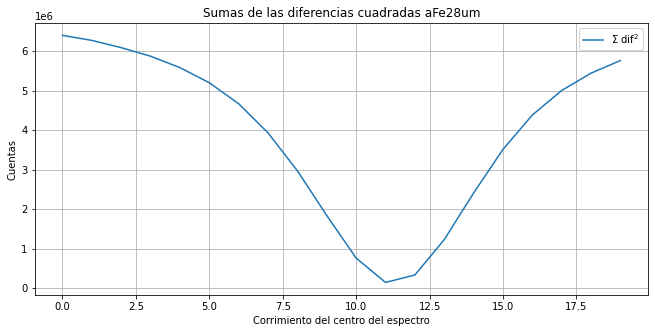

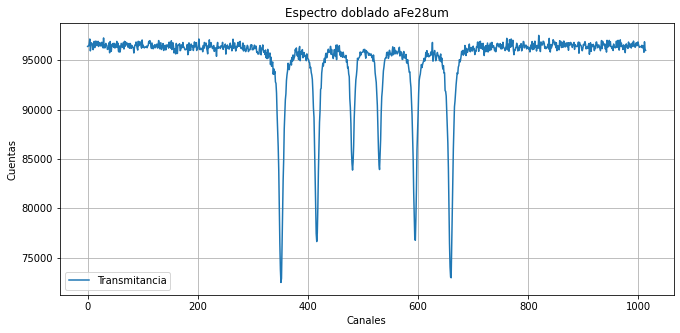

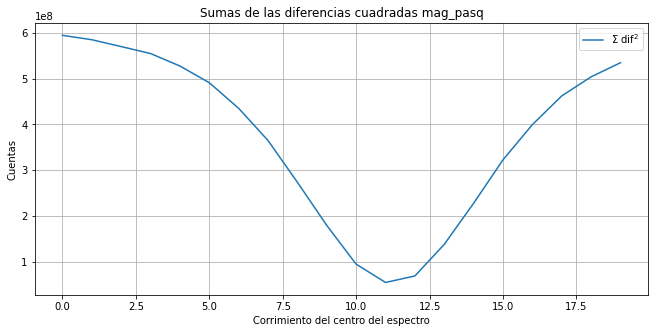

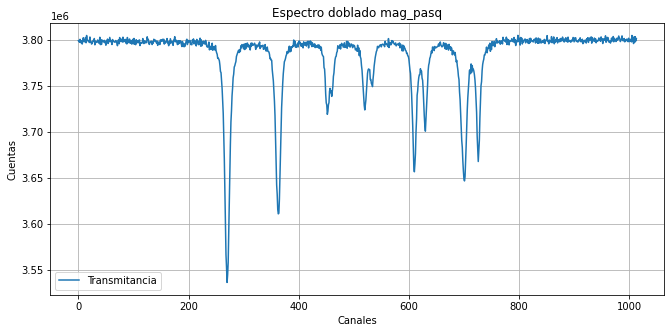

In [189]:
# busco el canal en donde doblar el espectro: armo una ventana móvil y divido el espectro en dos, después me quedo con la posición de la ventana que de la menor suma de ((izq_i - der_i)**2)/N
# también grafico las sumas en función del corrimiento de la ventana
# también obtengo el espectro final: doblado y sumado

max_shift = 20  # es también la cantidad de canales que se descartan al seleccionar la 
                # ventana. mejor si es par porque la cantidad inicial de canales es par :B

for key in espectros.keys():
    for spec in espectros[key]:
        # busco el corrimiento adecuado para el centro del espectro
        ok_shift, chi2 = mirror_compatibility(spec.cuentas,max_shift)

        # the chosen one
        izq,der = split_spec(spec.cuentas,final_lenght,ok_shift)
        der.reverse()
        spec.cuentas = [x + y for x, y in zip(izq, der)]
        # CUIDADO: acá se sobreescribió el espectro para poder usarlo así directamente. 
        # NO correr esta celda nuevamente antes de resetear los valores de las variables
        # del notebook.

        # grafico las sumas para cada corrimiento
        fig = plt.figure(figsize=(11,5))
        plt.plot(chi2, label=r"$\Sigma$ dif$^2$")
        #chi2_min_index = min(enumerate(chi2), key=itemgetter(1))[0] # el shift adecuado
        plt.title("Sumas de las diferencias cuadradas {}".format(key))
        plt.legend()
        plt.xlabel("Corrimiento del centro del espectro")
        plt.ylabel("Cuentas")
        plt.grid()
        plt.show()

        # grafico los espectros finales
        fig = plt.figure(figsize=(11,5))
        plt.plot(spec.cuentas, label=r"Transmitancia")
        plt.title("Espectro doblado {}".format(key))
        plt.legend()
        plt.xlabel("Canales")
        plt.ylabel("Cuentas")
        plt.grid()
        plt.show()

In [190]:
a = [0,1,2,3,4,5,6,7,8]
print(a[0:5])
print(a[8])
print(list(range(9)))
print(float("inf")>99999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999.9)

[0, 1, 2, 3, 4]
8
[0, 1, 2, 3, 4, 5, 6, 7, 8]
True
